## 4.2. Reducción de Dimensionalidad

La reducción de dimensionalidad es una técnica utilizada para simplificar modelos al reducir el número de variables en los datos, manteniendo al mismo tiempo la mayor cantidad posible de información relevante. Esto es especialmente útil en escenarios donde se trabaja con conjuntos de datos de alta dimensionalidad, como imágenes, datos genéticos, o análisis de texto.

### 4.2.1. Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica de reducción de dimensionalidad que transforma un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas, llamadas componentes principales. El PCA busca capturar la mayor cantidad de varianza en los datos originales utilizando menos dimensiones.

#### 4.2.1.1. Descomposición en valores singulares

El PCA se basa en la descomposición en valores singulares (SVD, por sus siglas en inglés) para transformar los datos en una nueva base donde las direcciones de mayor variabilidad (componentes principales) están alineadas con los ejes coordenados.

##### 4.2.1.1.1. Cálculo de autovalores y autovectores

Para entender el PCA, es esencial comprender los autovalores y autovectores:

- **Autovectores:** Son vectores que, cuando se multiplican por una matriz, solo se escalan (no cambian de dirección). En el contexto del PCA, los autovectores definen las direcciones de las nuevas dimensiones (componentes principales).
  
- **Autovalores:** Son los factores de escala correspondientes a cada autovector. En PCA, los autovalores indican cuánta varianza de los datos originales se captura por cada componente principal.

Matemáticamente, si \$mathbf{A}$ es la matriz de covarianza de los datos, entonces los autovalores $lambda$ y autovectores $mathbf{v}$ se encuentran resolviendo la ecuación:

$$
\mathbf{A} \mathbf{v} = \lambda \mathbf{v}
$$

##### 4.2.1.1.2. Varianza explicada y selección de componentes

La varianza explicada por cada componente principal se utiliza para determinar cuántos componentes retener. Esto se hace evaluando la proporción de la varianza total que es capturada por los primeros componentes principales.

Por ejemplo, si los primeros dos componentes principales explican el 95% de la varianza, se podría considerar usar solo esos dos componentes para simplificar el modelo.

$$
\text{Varianza explicada} = \frac{\text{Autovalor del componente}}{\text{Suma de todos los autovalores}}
$$

#### 4.2.1.2. Aplicación en compresión de imágenes

Una de las aplicaciones más comunes del PCA es la compresión de imágenes. Al reducir la dimensionalidad de una imagen, se puede representar con menos información mientras se conserva la mayor parte de su contenido visual.

##### 4.2.1.2.1. Implementación de PCA con NumPy

A continuación se presenta un ejemplo de cómo implementar PCA para comprimir imágenes utilizando NumPy. Aquí se reducirá la cantidad de información necesaria para representar una imagen en blanco y negro, conservando las características visuales más importantes.

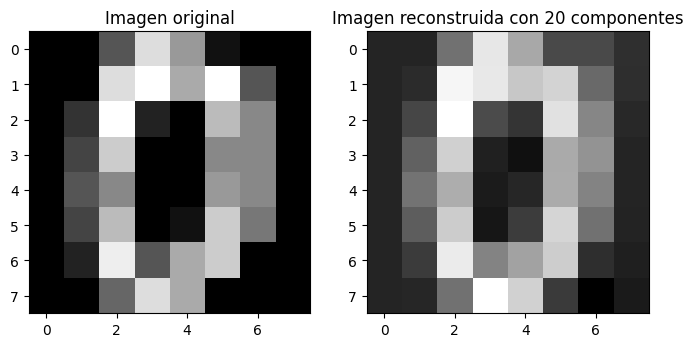

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Cargar un conjunto de datos de ejemplo (dígitos escritos a mano)
digits = load_digits()
X = digits.data
y = digits.target

# Centrar los datos (restar la media)
X_centered = X - np.mean(X, axis=0)

# Calcular la matriz de covarianza
cov_matrix = np.cov(X_centered, rowvar=False)

# Calcular los autovalores y autovectores
autovalores, autovectores = np.linalg.eigh(cov_matrix)

# Ordenar los autovectores por autovalor descendente
orden = np.argsort(autovalores)[::-1]
autovectores_ordenados = autovectores[:, orden]
autovalores_ordenados = autovalores[orden]

# Seleccionar las primeras N componentes principales
N = 20  # Número de componentes principales a retener
componentes_principales = autovectores_ordenados[:, :N]

# Proyectar los datos originales en el nuevo espacio de componentes principales
X_reducido = np.dot(X_centered, componentes_principales)

# Reconstruir la imagen desde el espacio reducido
X_reconstruido = np.dot(X_reducido, componentes_principales.T) + np.mean(X, axis=0)

# Visualización de una imagen original y su versión reconstruida
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(X[0].reshape(8, 8), cmap='gray')
ax[0].set_title("Imagen original")
ax[1].imshow(X_reconstruido[0].reshape(8, 8), cmap='gray')
ax[1].set_title(f"Imagen reconstruida con {N} componentes")
plt.show()

En este ejemplo, se utiliza un conjunto de datos de dígitos escritos a mano para aplicar PCA y reducir la dimensionalidad de las imágenes. La imagen reconstruida a partir de los primeros 20 componentes principales es muy similar a la original, pero con menos datos.

##### 4.2.1.2.2. Visualización de componentes principales

La visualización de los componentes principales puede ayudar a entender qué información está capturando cada componente y cómo se distribuyen los datos en el nuevo espacio reducido.

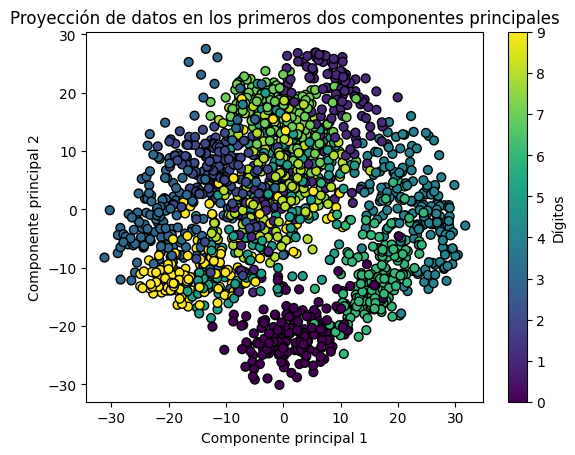

In [2]:
# Visualización de los dos primeros componentes principales
plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Proyección de datos en los primeros dos componentes principales')
plt.colorbar(label='Dígitos')
plt.show()

Esta visualización muestra cómo los datos (dígitos en este caso) se distribuyen en el espacio de las dos primeras componentes principales, lo que puede proporcionar una idea de cómo se agrupan los datos en este espacio reducido.

El PCA es una técnica fundamental en la reducción de dimensionalidad, permitiendo simplificar datos complejos manteniendo la mayor cantidad de información relevante posible. Aplicado en casos como la compresión de imágenes, PCA puede reducir significativamente el tamaño de los datos mientras conserva sus características clave, facilitando el análisis y procesamiento en aplicaciones del mundo real.

### 4.2.2. t-SNE y UMAP

t-SNE (t-distributed Stochastic Neighbor Embedding) y UMAP (Uniform Manifold Approximation and Projection) son técnicas avanzadas de reducción de dimensionalidad, diseñadas específicamente para visualizar datos de alta dimensionalidad. Ambas técnicas son particularmente útiles para encontrar patrones y estructuras ocultas en los datos, y son populares en áreas como la biología computacional, el análisis de redes sociales y la exploración de datos textuales.

#### 4.2.2.1. Fundamentos matemáticos

##### 4.2.2.1.1. Divergencia de Kullback-Leibler

La divergencia de Kullback-Leibler (KL) es una medida de la diferencia entre dos distribuciones de probabilidad. En t-SNE, esta medida se utiliza para comparar las similitudes entre puntos en el espacio de alta dimensionalidad y su representación en un espacio de baja dimensionalidad.

En t-SNE, el objetivo es minimizar la divergencia KL entre las distribuciones de similitud en el espacio original y en el espacio reducido, asegurando que puntos cercanos en el espacio original permanezcan cercanos en el espacio reducido.

Matemáticamente, si \(P\) es la matriz de similitud en el espacio original y \(Q\) es la matriz de similitud en el espacio reducido, la divergencia KL se define como:

$$
KL(P \| Q) = \sum_{i \neq j} P_{ij} \log \frac{P_{ij}}{Q_{ij}}
$$

El objetivo del t-SNE es encontrar una representación en baja dimensionalidad que minimice esta divergencia.

##### 4.2.2.1.2. Optimización de embebimientos

Tanto t-SNE como UMAP optimizan los embebimientos (es decir, las representaciones en un espacio reducido) mediante técnicas de optimización que ajustan las posiciones de los puntos para preservar las relaciones de proximidad observadas en los datos originales:

- **t-SNE:** Utiliza un algoritmo de descenso de gradiente para minimizar la divergencia de Kullback-Leibler entre las distribuciones de similitud en los espacios original y reducido.
  
- **UMAP:** Emplea un enfoque diferente basado en la teoría de la topología algebraica. UMAP construye un gráfico en el espacio original que captura la estructura de los datos y luego optimiza un embebimiento en el espacio de baja dimensionalidad que preserva esta estructura.

#### 4.2.2.2. Visualización de datos de alta dimensionalidad

Ambas técnicas son especialmente útiles para visualizar datos complejos, como imágenes, textos o cualquier tipo de dato con alta dimensionalidad. La reducción de dimensionalidad permite proyectar estos datos en dos o tres dimensiones, facilitando su exploración y análisis.

##### 4.2.2.2.1. Implementación con scikit-learn y umap-learn

A continuación, un ejemplo de cómo implementar t-SNE y UMAP para visualizar un conjunto de datos de alta dimensionalidad utilizando `scikit-learn` y `umap-learn`:

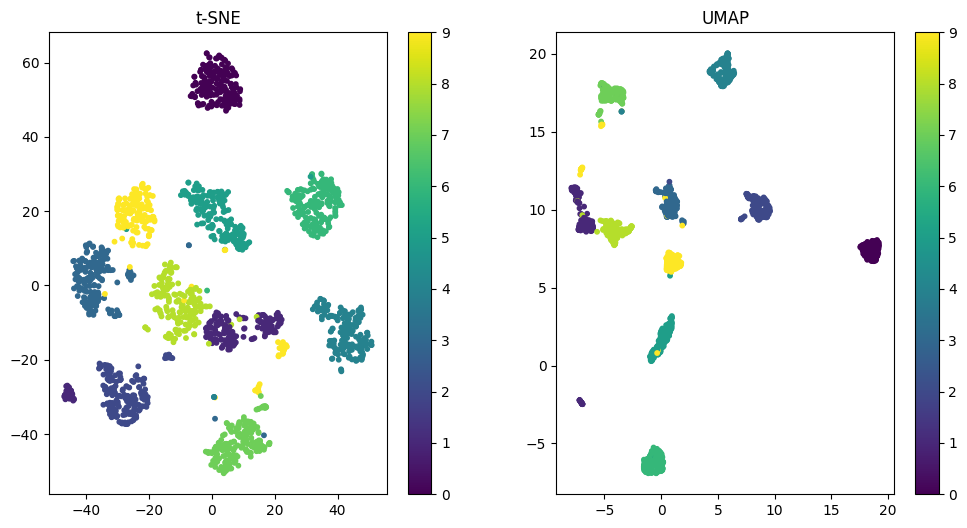

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import umap.umap_ as umap
import warnings

# Suppress specific UserWarning from UMAP
warnings.filterwarnings("ignore", message="n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.")

# Cargar un conjunto de datos de ejemplo (dígitos escritos a mano)
digits = load_digits()
X = digits.data
y = digits.target

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Aplicar UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Visualización de t-SNE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=10)
plt.title('t-SNE')
plt.colorbar()

# Visualización de UMAP
plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=10)
plt.title('UMAP')
plt.colorbar()

plt.show()

##### 4.2.2.2.2. Comparación de resultados entre t-SNE y UMAP

La comparación entre t-SNE y UMAP puede mostrar cómo cada técnica maneja la preservación de la estructura de los datos en espacios reducidos:

- **t-SNE:** Es muy efectivo para separar clusters cuando se trata de visualizar datos, especialmente en dos dimensiones. Sin embargo, es computacionalmente intensivo y puede ser lento con conjuntos de datos grandes. Además, t-SNE puede ser sensible a la elección de parámetros y no conserva bien la globalidad de las estructuras (es decir, las relaciones entre clusters distantes).

- **UMAP:** Es generalmente más rápido que t-SNE y puede manejar grandes conjuntos de datos de manera más eficiente. UMAP tiende a preservar tanto las estructuras locales como globales mejor que t-SNE, lo que puede ser ventajoso dependiendo de la aplicación.

La visualización resultante muestra cómo los datos de alta dimensionalidad se distribuyen en un espacio de baja dimensionalidad, permitiendo identificar patrones, clusters y posibles relaciones entre los datos que no son evidentes en su forma original.

t-SNE y UMAP son herramientas poderosas para la visualización de datos de alta dimensionalidad. Mientras que t-SNE es conocido por su capacidad de separar clusters y capturar la estructura local, UMAP ofrece ventajas en términos de velocidad y preservación tanto de la estructura local como global. Dependiendo del caso de uso, una u otra técnica puede ser más adecuada para explorar y entender datos complejos en la práctica.